1. 밝기 조절 cv2.add, np.clip().astype(np.uint8)
2. 가중치 합 cv2.addWeighted(src1=, alpha=, src2=, beta=, gamma=)
3. 뺄셈 연산 cv2.subtract(src1, src2)
4. 차이 연산 cv2.absdiff(src1, src2)
5. 명암비 조절 dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8)
6. 대비 조절 >> histogram stretching & normalize
stretched = np.uint8((image - min_val) / (max_val - min_val) * 255)
normalized = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

In [ ]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [ ]:

# src = cv2.imread('/home/addinedu/dev_ws/opencv/data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
# if src is None:
#     print('Image load failed!')
#     sys.exit()

# dst1 = cv2.add(src, 100)
# dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)
# cv2.imshow('src', src)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.waitKey()

src = cv2.imread('/home/addinedu/dev_ws/opencv/data/lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

dst1 = cv2.add(src, (100, 100, 100, 0))
dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2 ', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

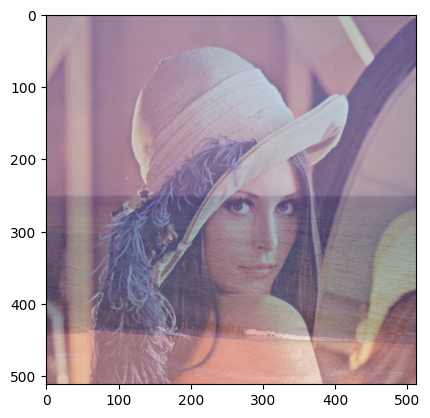

In [4]:
src1 = cv2.imread('./data/lenna.bmp')
src2 = cv2.imread('./data/sky.bmp')
resize_src2 = cv2.resize(src2, (src1.shape[1], src1.shape[0]))

dst = cv2.addWeighted(src1=src1, alpha=0.5, src2=resize_src2, beta=0.5, gamma=0)
show_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(show_dst)

In [13]:
import numpy as np
import cv2
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
if src is None:
    print('Image load failed!')
    sys.exit()
alpha = 1.0
dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
import sys
import numpy as np
import cv2

src = cv2.imread('/home/addinedu/dev_ws/opencv/data/candies.png')

if src is None:
    print('g')
    sys.exit()

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

dst1 = cv2.inRange(src, (0,128,0), (100,255,100))

dst2 = cv2.inRange(src_hsv, (50,150,0), (80,255,255))

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()


트랙바ㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏ

In [9]:
import cv2
import numpy as np
img = cv2.imread("/home/addinedu/dev_ws/opencv/data/candies2.png")

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

def nothing(x):
    pass

cv2.namedWindow("HSV_Image")
cv2.createTrackbar('Low Hue Min', 'HSV_Image', 0, 179, nothing)
cv2.createTrackbar('Low Hue Max', 'HSV_Image', 0, 179, nothing)
cv2.createTrackbar('High Hue Min', 'HSV_Image', 0, 179, nothing)
cv2.createTrackbar('High Hue Max', 'HSV_Image', 0, 179, nothing)
cv2.createTrackbar('Sat Min', 'HSV_Image', 0, 255, nothing)
cv2.createTrackbar('Sat Max', 'HSV_Image', 0, 255, nothing)
cv2.createTrackbar('Val Min', 'HSV_Image', 0, 255, nothing)
cv2.createTrackbar('Val Max', 'HSV_Image', 0, 255, nothing)

while True:
    low_h_min = cv2.getTrackbarPos('Low Hue Min', 'HSV_Image')
    low_h_max = cv2.getTrackbarPos('Low Hue Max', 'HSV_Image')
    high_h_min = cv2.getTrackbarPos('High Hue Min', 'HSV_Image')
    high_h_max = cv2.getTrackbarPos('High Hue Max', 'HSV_Image')
    s_min = cv2.getTrackbarPos('Sat Min', 'HSV_Image')
    s_max = cv2.getTrackbarPos('Sat Max', 'HSV_Image')
    v_min = cv2.getTrackbarPos('Val Min', 'HSV_Image')
    v_max = cv2.getTrackbarPos('Val Max', 'HSV_Image')
    lower_color1 = np.array([low_h_min, s_min, v_min])
    upper_color1 = np.array([low_h_max, s_max, v_max])
    lower_color2 = np.array([high_h_min, s_min, v_min])
    upper_color2 = np.array([high_h_max, s_max, v_max])
    mask1 = cv2.inRange(hsv_img, lower_color1, upper_color1)
    mask2 = cv2.inRange(hsv_img, lower_color2, upper_color2)
    mask = cv2.bitwise_or(mask1, mask2)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow("img", img)
    cv2.imshow("mask1", mask1)
    cv2.imshow("mask2", mask2)
    cv2.imshow("mask", mask)
    cv2.imshow('result', result)
    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()